# Demand Forecasting

# CSE Batch 1- 
[ Arundhuti Sen, Arko Chatterjee, Debasmita Raha, Deepankar Mehta ]

# Introduction to Daily Demand Forecasting Model For Restaurant Orders
This project involves creating a machine learning model to predict daily demand based on past order data. 
By forecasting future orders, businesses can optimize inventory, reduce waste, and better meet customer needs. 

The project demonstrates how simple machine learning techniques like linear regression or time series analysis can improve operational efficiency.

In [25]:
# importing intrensic libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset 
This test dataset contains the historical sales data.
With the help of this data we will perform our exploitary data analysis followed by immplementation of machine learning model.

In [2]:
df = pd.read_csv("Daily Demand Forecasting Orders.csv")
df.head()

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


# Columns had to be renamed because from the dataset we cannot infer which column represented what. 

In [3]:

df.rename(columns={'Week of the month (first week, second, third, fourth or fifth week':'Week','Day of the week (Monday to Friday)':'Day'}, inplace=True)
df.columns


Index(['Unnamed: 0', 'Week', 'Day', 'Non-urgent order', 'Urgent order',
       'Order type A', 'Order type B', 'Order type C', 'Fiscal sector orders',
       'Orders from the traffic controller sector', 'Banking orders (1)',
       'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)'],
      dtype='object')

# Now we will perform basic data analysis to find out what is in store of the dataset

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 60 non-null     int64  
 1   Week                                       60 non-null     int64  
 2   Day                                        60 non-null     int64  
 3   Non-urgent order                           60 non-null     float64
 4   Urgent order                               60 non-null     float64
 5   Order type A                               60 non-null     float64
 6   Order type B                               60 non-null     float64
 7   Order type C                               60 non-null     float64
 8   Fiscal sector orders                       60 non-null     float64
 9   Orders from the traffic controller sector  60 non-null     int64  
 10  Banking orders (1)          

# Describing the statistics of the dataset  

In [5]:
df.describe()

,Unnamed: 0,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.500000,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,17.464249,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,0.000000,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,14.750000,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,29.500000,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,44.250000,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,59.000000,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


# Pairplot analysis 
This plot is done to find which data is related to each other and it returns which data is forming clusters when correlated.

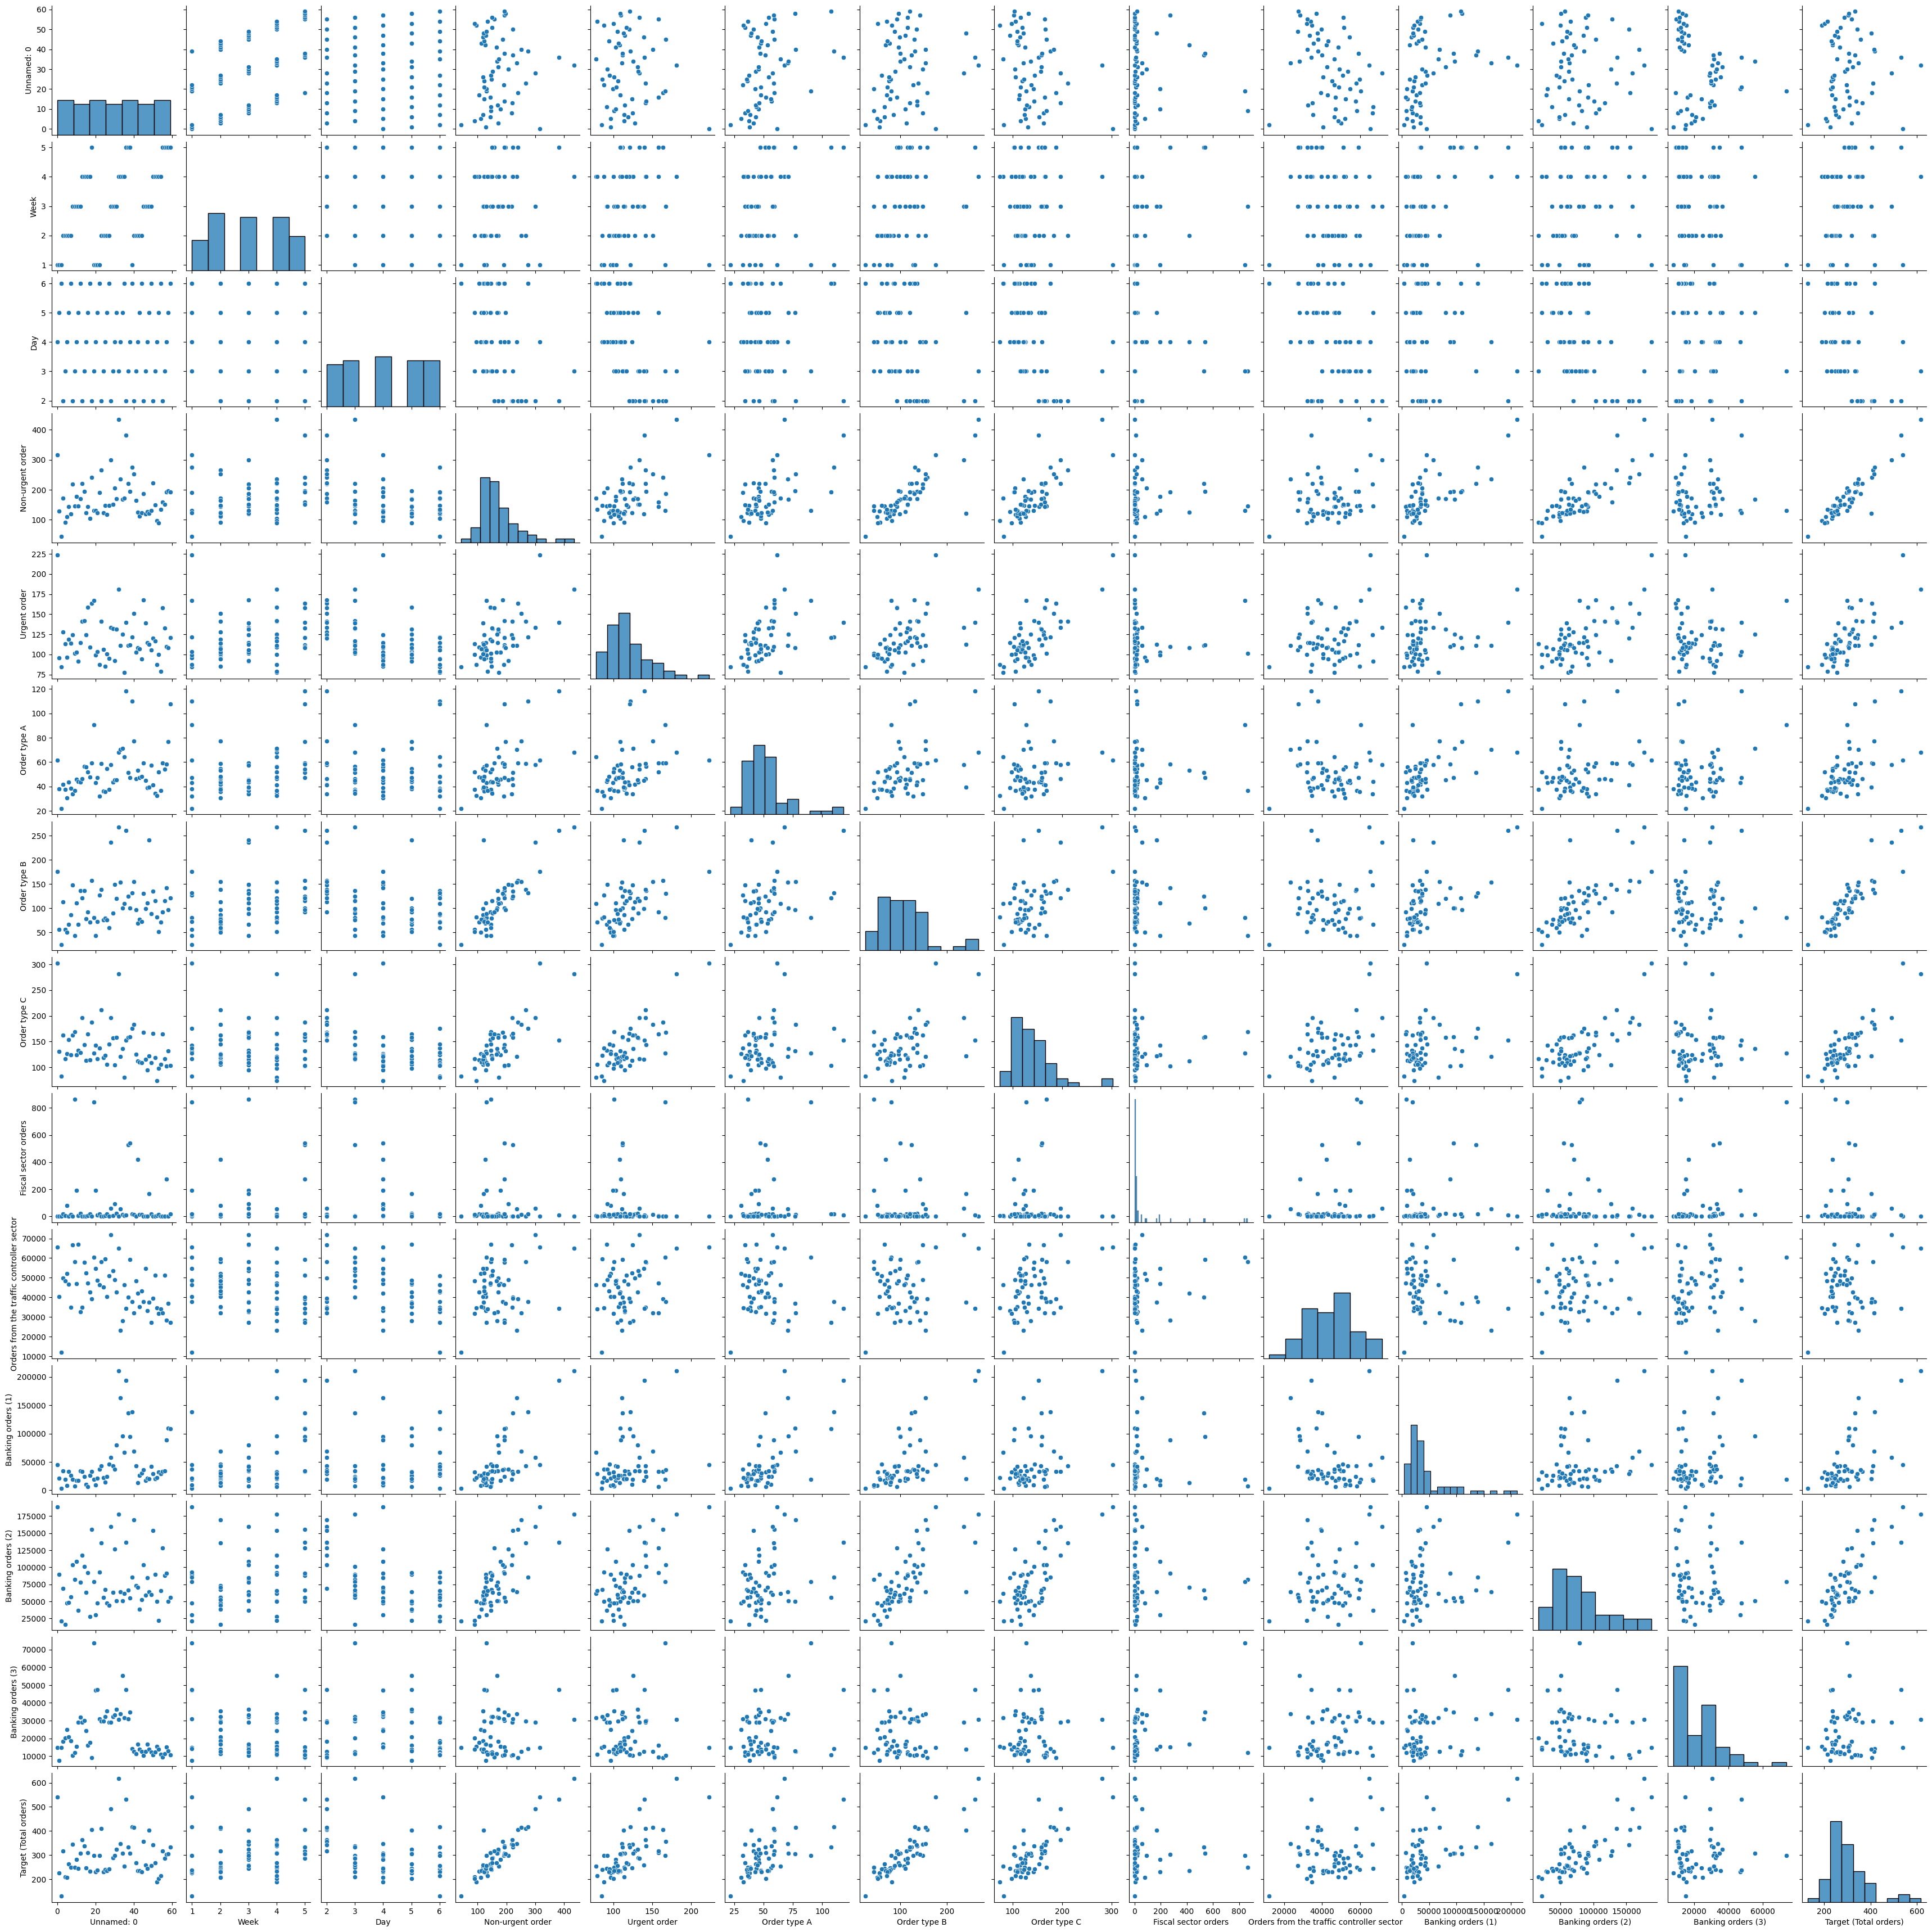

In [6]:
sns.pairplot(df)

# Correlation and Heatmap
Corr() is used to find the correlation score between each column.
And then Heatmap is plotted using the correlated data.


<Axes: >

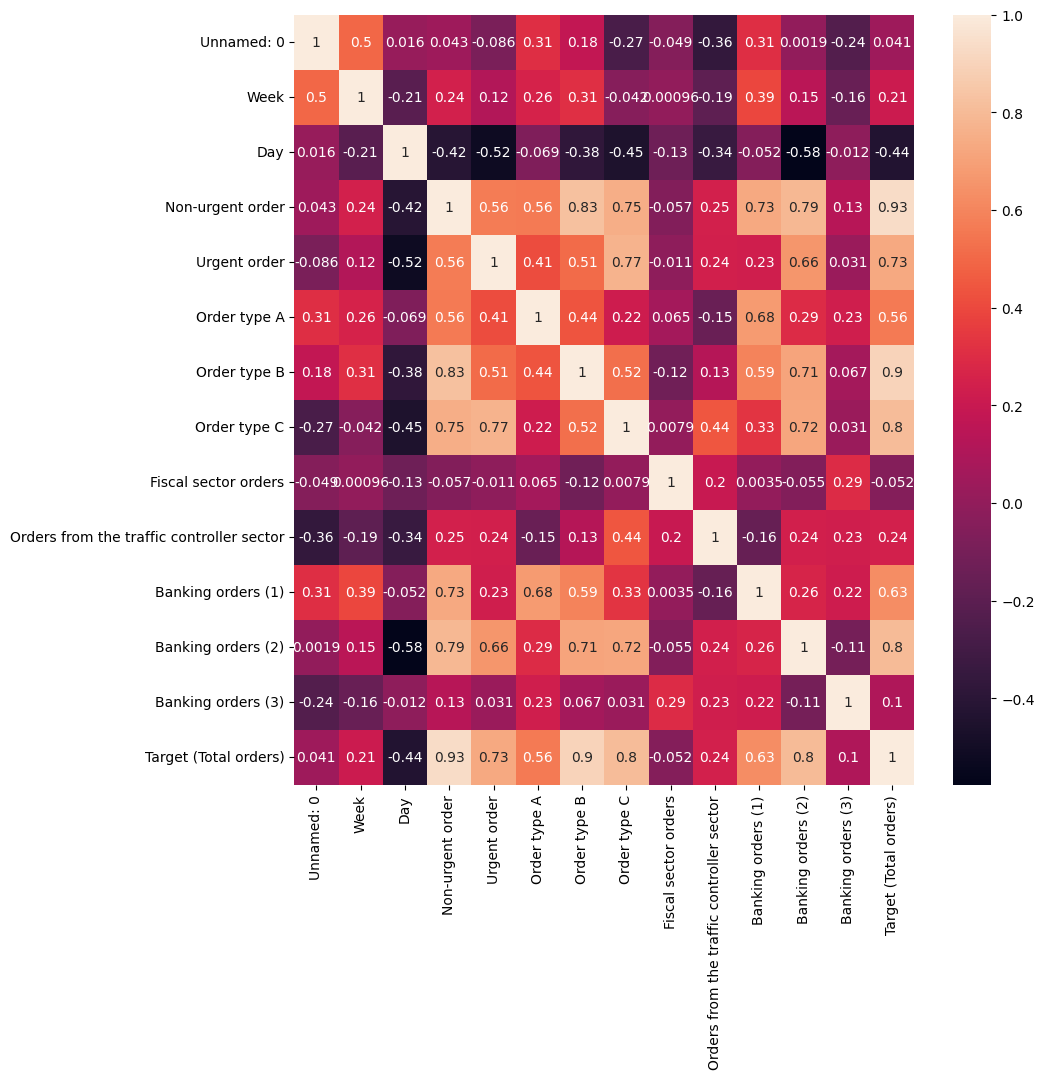

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

# Implementation of ML Algorithm
For that we cannot take all the columns . We have to perform the operation on few related columns which we can do with the info from the above created Heatmap

In [8]:
df.columns

Index(['Unnamed: 0', 'Week', 'Day', 'Non-urgent order', 'Urgent order',
       'Order type A', 'Order type B', 'Order type C', 'Fiscal sector orders',
       'Orders from the traffic controller sector', 'Banking orders (1)',
       'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)'],
      dtype='object')

# 
Selecting specific columns that are most relevant for modeling
This step involves choosing features that are expected to have a significant impact on the target variable


In [9]:
df1 = df[["Urgent order", 'Order type A', 'Order type B', 'Banking orders (1)', "Target (Total orders)"]].copy()

# 
Displaying the first few rows of the selected columns to ensure correct selection

In [10]:
df1.head()

,Urgent order,Order type A,Order type B,Banking orders (1),Target (Total orders)
0,223.270,61.543,175.586,44914,539.577
1,96.042,38.058,56.037,21399,224.675
2,84.375,21.826,25.125,3452,129.412
3,127.667,41.542,113.294,33703,317.120
4,113.526,37.679,56.618,19646,210.517


#
Visualizing pairwise relationships with a Kernel Density Estimate (KDE) on the diagonal
#
KDE provides a smoothed estimate of the distribution of data, helping to understand its underlying structure

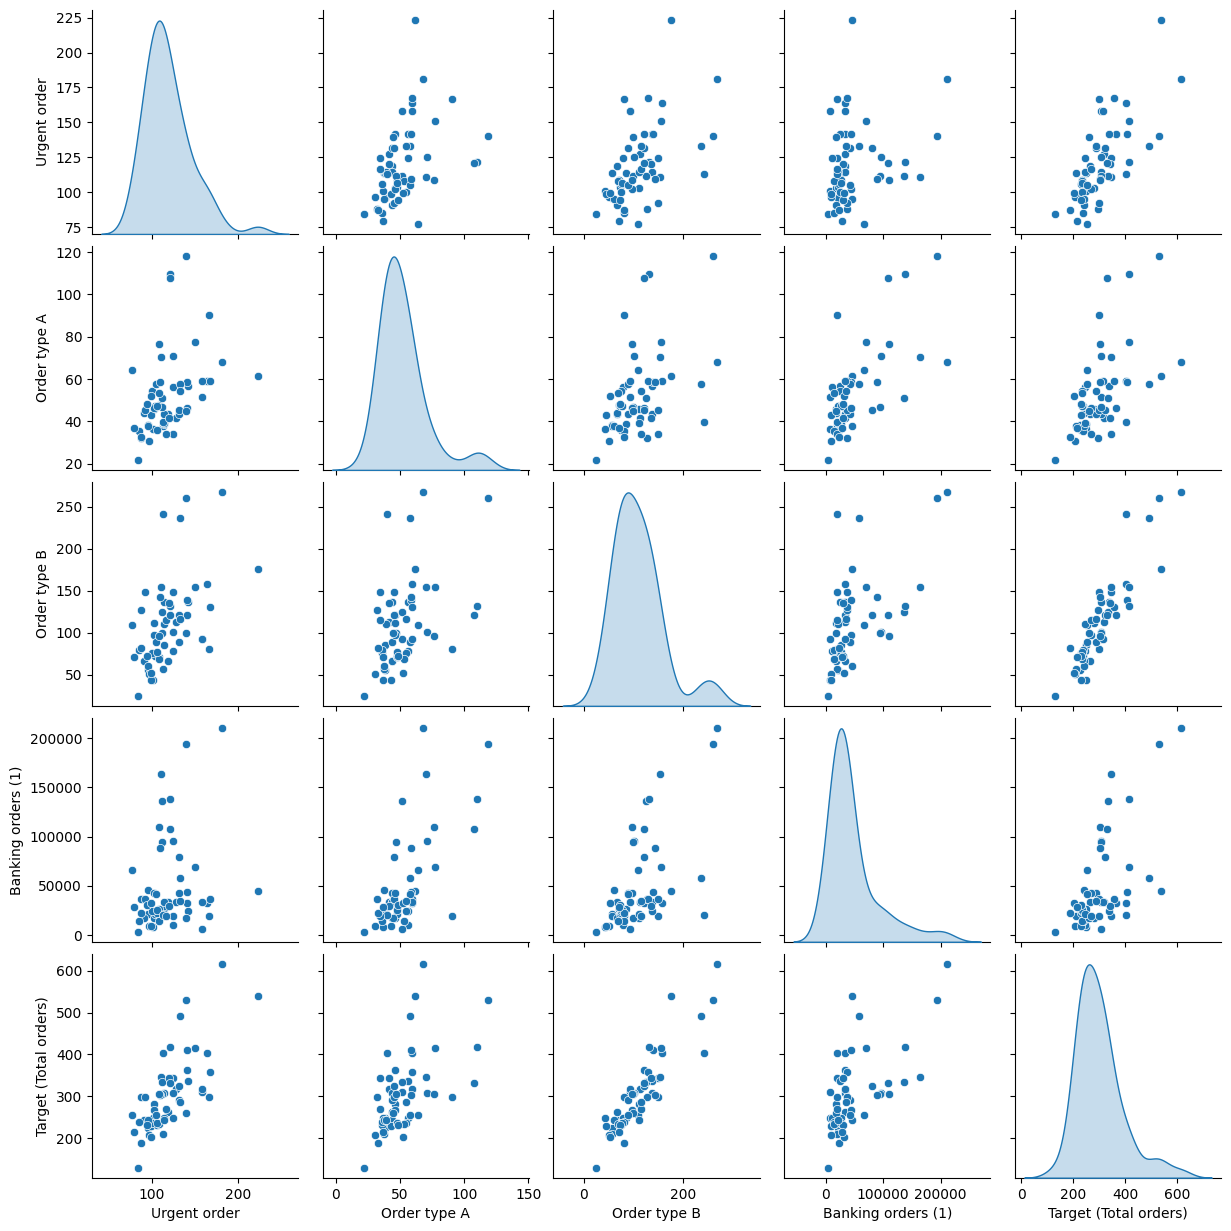

In [11]:
sns.pairplot(df1, diag_kind='kde')

# 
Checking the distribution of the 'Week' feature
Understanding how data is distributed across different weeks can help in feature engineering

In [12]:
df.Week.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    3
13    4
14    4
15    4
16    4
17    4
18    5
19    1
20    1
21    1
22    1
23    2
24    2
25    2
26    2
27    2
28    3
29    3
30    3
31    3
32    4
33    4
34    4
35    4
36    5
37    5
38    5
39    1
40    2
41    2
42    2
43    2
44    2
45    3
46    3
47    3
48    3
49    3
50    4
51    4
52    4
53    4
54    4
55    5
56    5
57    5
58    5
59    5
Name: Week, dtype: int64>

#
Visualizing the distribution of data across different weeks
Countplot shows the frequency of occurrences for each category in the 'Week' feature

<Axes: ylabel='count'>

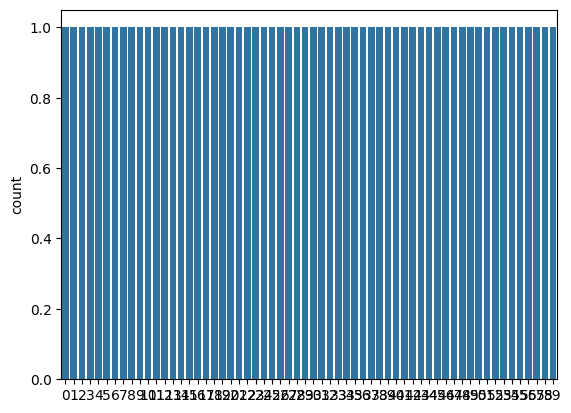

In [13]:
sns.countplot(df.Week)

# 
Visualizing the distribution of data across different days
Similar to the 'Week' feature, this helps understand how demand varies by day

<Axes: ylabel='count'>

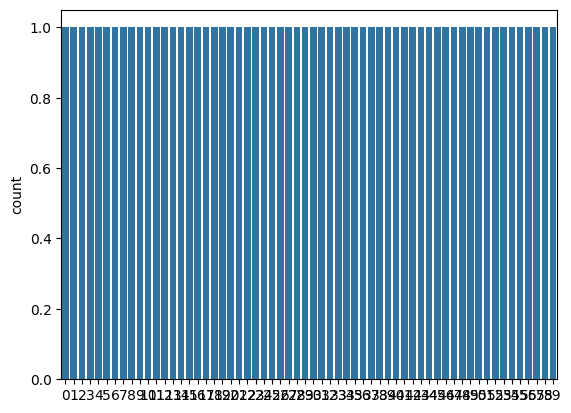

In [14]:
sns.countplot(df.Day)

# 
Applying one-hot encoding to categorical variables ('Week' and 'Day')

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [15]:
#One hot encoding

df1 = pd.get_dummies(df, columns=["Week", "Day"])
df1.head()

,Unnamed: 0,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),...,Week_1,Week_2,Week_3,Week_4,Week_5,Day_2,Day_3,Day_4,Day_5,Day_6
0,0,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,...,True,False,False,False,False,False,False,True,False,False
1,1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,...,True,False,False,False,False,False,False,False,True,False
2,2,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,...,True,False,False,False,False,False,False,False,False,True
3,3,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,...,False,True,False,False,False,True,False,False,False,False
4,4,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,...,False,True,False,False,False,False,True,False,False,False


# 
Checking the shape of the transformed dataset
#
After one-hot encoding, the dataset typically increases in the number of columns

In [16]:
df1.shape

(60, 22)

# 
Splitting the dataset into features (X) and target variable (y)
The target variable is what we want to predict, and features are the inputs that will be used to make predictions

In [17]:
#splitting of train-test data

y = df1["Target (Total orders)"].copy() # Target variable
y.head()

0    539.577
1    224.675
2    129.412
3    317.120
4    210.517
Name: Target (Total orders), dtype: float64

In [18]:
X = df1.drop("Target (Total orders)", axis=1)  # Features (all other columns)
X.head()

,Unnamed: 0,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),...,Week_1,Week_2,Week_3,Week_4,Week_5,Day_2,Day_3,Day_4,Day_5,Day_6
0,0,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,...,True,False,False,False,False,False,False,True,False,False
1,1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,...,True,False,False,False,False,False,False,False,True,False
2,2,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,...,True,False,False,False,False,False,False,False,False,True
3,3,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,...,False,True,False,False,False,True,False,False,False,False
4,4,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,...,False,True,False,False,False,False,True,False,False,False


# 
Splitting the dataset into training and testing sets with a 67-33 split. 
The training set is used to train the model, while the test set is used to evaluate its performance

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=51)

print(len(X_train))
print(len(X_test))


40
20


# 
Scaling the features using StandardScaler for better model performance

Scaling standardizes the features to have a mean of 0 and a standard deviation of 1, which helps in faster convergence and better performance of the model

In [20]:
#Scaling

scaler = StandardScaler()

# 
Fitting the scaler on the training data and transforming both training and testing data

It's important to fit the scaler only on the training data to avoid data leakage

In [21]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# 
Printing the R² score of the model on the test data
R² (coefficient of determination) indicates how well the model explains the variability of the target variable
#

Printing the coefficients of the features
The coefficients indicate the strength and direction of the relationship between each feature and the target variable
#

Printing the shape of the coefficients array
This shows how many coefficients (one per feature) were calculated
#

Printing the intercept of the model
The intercept represents the expected value of the target variable when all features are zero
#

Calculating and printing the Mean Squared Error (MSE) of the model's predictions
MSE is a measure of the average squared difference between the actual and predicted values; lower values indicate better performance


In [22]:
#Linear Regression

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.coef_)
print(reg.coef_.shape)
print(reg.intercept_)
print(mean_squared_error(y_test, reg.predict(X_test)))

0.915181355108367
[-3.25905513e-14  2.13162821e-14 -1.17462663e-14  1.63819509e+01
  5.72665388e+01  3.94760322e+01 -8.12781857e-15 -1.33305473e-14
 -3.63778548e-15 -4.20067065e-14 -3.76141846e-14 -2.38143930e-14
 -1.01050657e-14 -2.20274837e-14  9.63455057e-15  3.20948801e-14
  2.51859573e-15  4.10782519e-15  3.41948692e-14  4.44089210e-15
  8.88178420e-16]
(21,)
301.19302500000003
494.9478157513657


# Hence, we can see that we've got 0.9151813551083667 
# => 91% as our model accuracy score which means our model is 91% accurate.  

# 
Printing the predicted values for the test set
These are the demand forecasts generated by the model based on the test data

In [23]:
print(reg.predict(X_test))

[194.3791519  332.87777691 574.50419714 296.14811638 359.52039016
 215.02112654 277.40761693 319.72214175 371.58405938 417.34102385
 335.77895736 178.45875537 190.54091378 227.13092747 256.47741337
 335.09501062 269.75625822 283.35507734 380.12868622 208.63289932]


# Comparison of Actual vs Predicted Values with Linear Regression Line for Training and Test Data









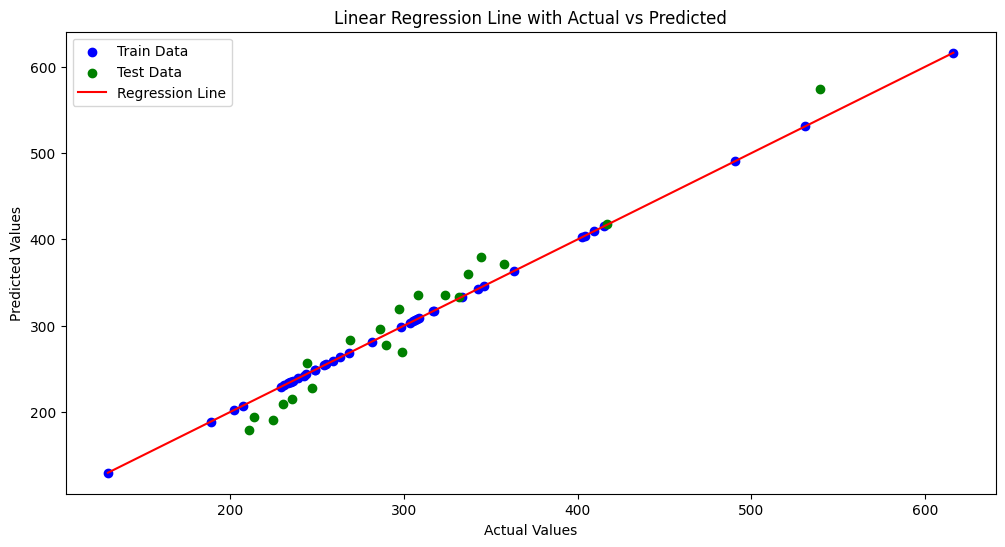

In [33]:

# Predicting values for the entire dataset using the trained model
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# Plotting the training data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data')
plt.scatter(y_test, y_pred_test, color='green', label='Test Data')

# Plotting the linear regression line
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='-', label='Regression Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Line with Actual vs Predicted')
plt.legend()
plt.show()

# Interpolated Data and Extrapolated Data with Linear Regression Line


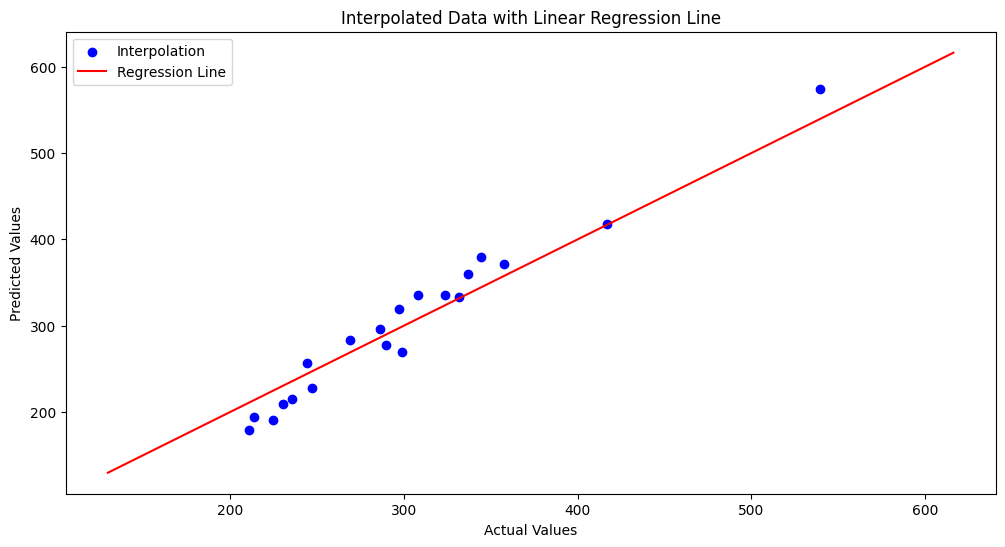

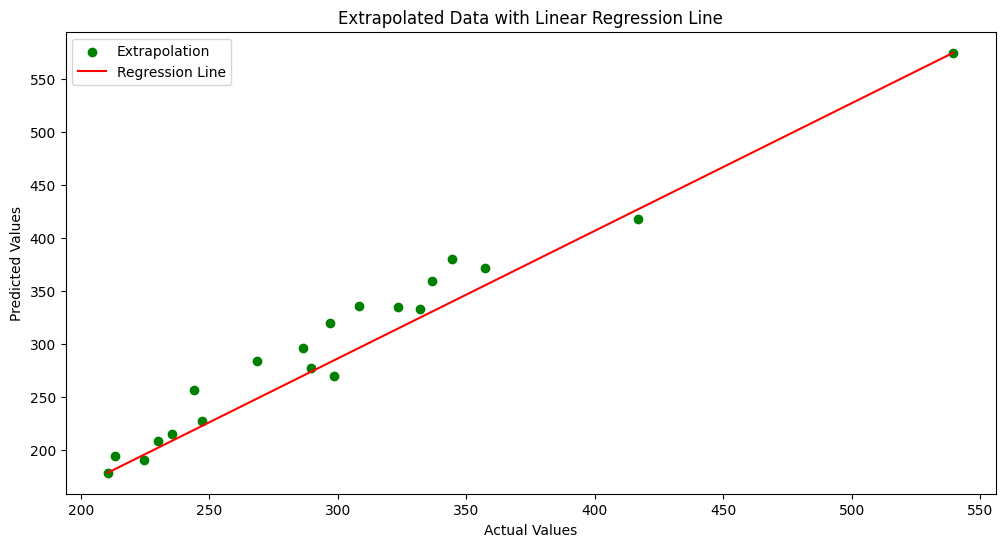

In [35]:
# Define the range of interpolation
min_train, max_train = y_train.min(), y_train.max()

# Identifying interpolated and extrapolated data points
interp_indices = (y_test >= min_train) & (y_test <= max_train)
extrap_indices = interp_indices

# Plotting interpolated data
plt.figure(figsize=(12, 6))
plt.scatter(y_test[interp_indices], y_pred_test[interp_indices], color='blue', label='Interpolation')
plt.plot([min_train, max_train], [min_train, max_train], color='red', linestyle='-', label='Regression Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Interpolated Data with Linear Regression Line')
plt.legend()
plt.show()

# Plotting extrapolated data
plt.figure(figsize=(12, 6))
plt.scatter(y_test[extrap_indices], y_pred_test[extrap_indices], color='green', label='Extrapolation')
plt.plot([min(y_test[extrap_indices]), max(y_test[extrap_indices])], 
         [min(y_pred_test[extrap_indices]), max(y_pred_test[extrap_indices])], 
         color='red', linestyle='-', label='Regression Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Extrapolated Data with Linear Regression Line')
plt.legend()
plt.show()

# Predicted vs Actual Values with Linear Regression Line 

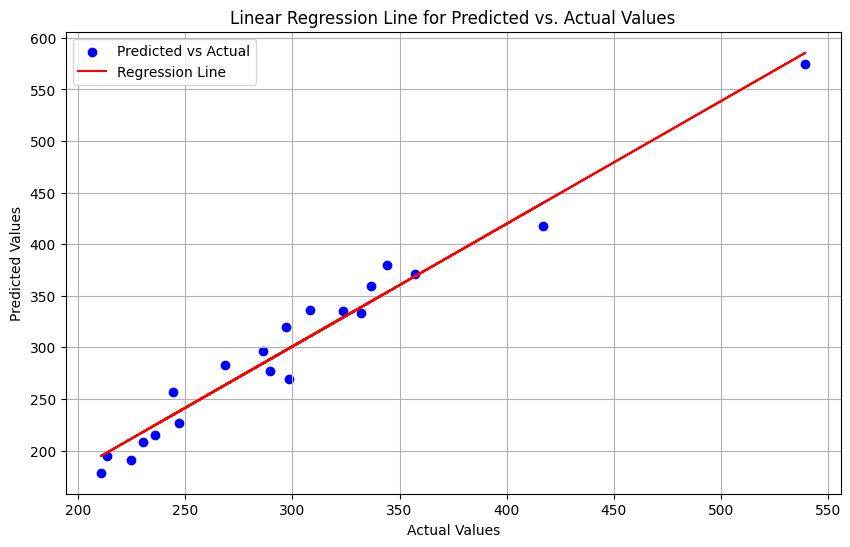

In [27]:

# Predict the values using the test data
y_pred = reg.predict(X_test)

# Plotting the actual vs predicted values as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plotting the regression line
# Fit a line to the predicted vs. actual data points
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Line for Predicted vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()
